Physics 474 - Spring 2023

Lab 1 - Data Analysis; Making cuts,Fitting and confidence intervals with data<br>

Z-Boson Mass Peak and Width 

<font color='red'>Author: Dillon Walton
    


________________________________________________________________________________
Background:

(see presentation from Lecure on ELMS)

We will be looking at hypothetical data from a "collider detector" that measures particle energies and momentum coming from interactions of colliding beams in the detector centeral region. The  "event data" from this hypothetical experiment are measurements of the resulting electron and positron energies and momentum vectors in a particle detector, hopefully from the decay $Z \rightarrow e^+ \; e^-$. 

The data given here represent measurments of the energies that are NOT smeared by finite detector energy resolution (i.e. these are perfect energy measurments). In real life the reconstructed mass distribution would broadened, or smeared, by finite energy measurement resolution of the detector. To fit the data you would need to use a monte carlo simulation to smear the measured energies drawn from the Breit-wigner with some resolution function appropriate to your detector and then fit that smeared function to the reconstructed data. We will be picking this back up near the end of the semester! 


The goal of the Lab is to

- take those measured values from the detector data and reconstruct the distribution of the reconstructed invariant mass using the equation:

$m^2 = 2(E_1E_2-\vec{p}_1 \cdot \vec{p}_2)$ 

- fit the reconstructed mass data distribution to a Breit-Wigner distribution $\cal{M}_{bw}$

$\Large \cal{M}_{bw}(m;m_0,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}$

to get the best-fit central mass ($m_0$) and width(FWHM) $(\Gamma)$ parameters  as well as the confidence intervals for the 2 parameters and the 2-D joint confidence region.


___________________________________________________________________
Part 1 (4 pts)

Look at the comma-separated-variable text file 'Z->e+e-_Data_500.csv' to see the format of the data described in the first few lines of the file.

You are asked to
- read in the data file 'Z->e+e-_Data_500.csv'. 
- make histogram distributions of the 4 variables for each particle (8 total)
- the distribution of the reconstruced inavriant mass
- print how many total events there are



In [43]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [152]:
## Read in data
raw_data = pd.read_csv('./Z-_e+e-_Data_500-mod.csv', sep="  ", engine='python', names=["E1","P1_x","P1_y","P1_z","E2","P2_x","P2_y","P2_z"])
data = raw_data[3:]
data = data.astype(float)

# Derived values
data['p1'] = (data['P1_x']) + (data['P1_y']) + (data['P1_z'])
data['p2'] = (data['P2_x']) + (data['P2_y']) + (data['P2_z'])
data['rim'] = np.sqrt(2*((data['E1'] * data['E2']) - (((data['P1_x']) * (data['P2_x'])) + ((data['P1_y']) * (data['P2_y'])) + ((data['P1_z']) * (data['P2_z'])))))


Text(0, 0.5, 'Count')

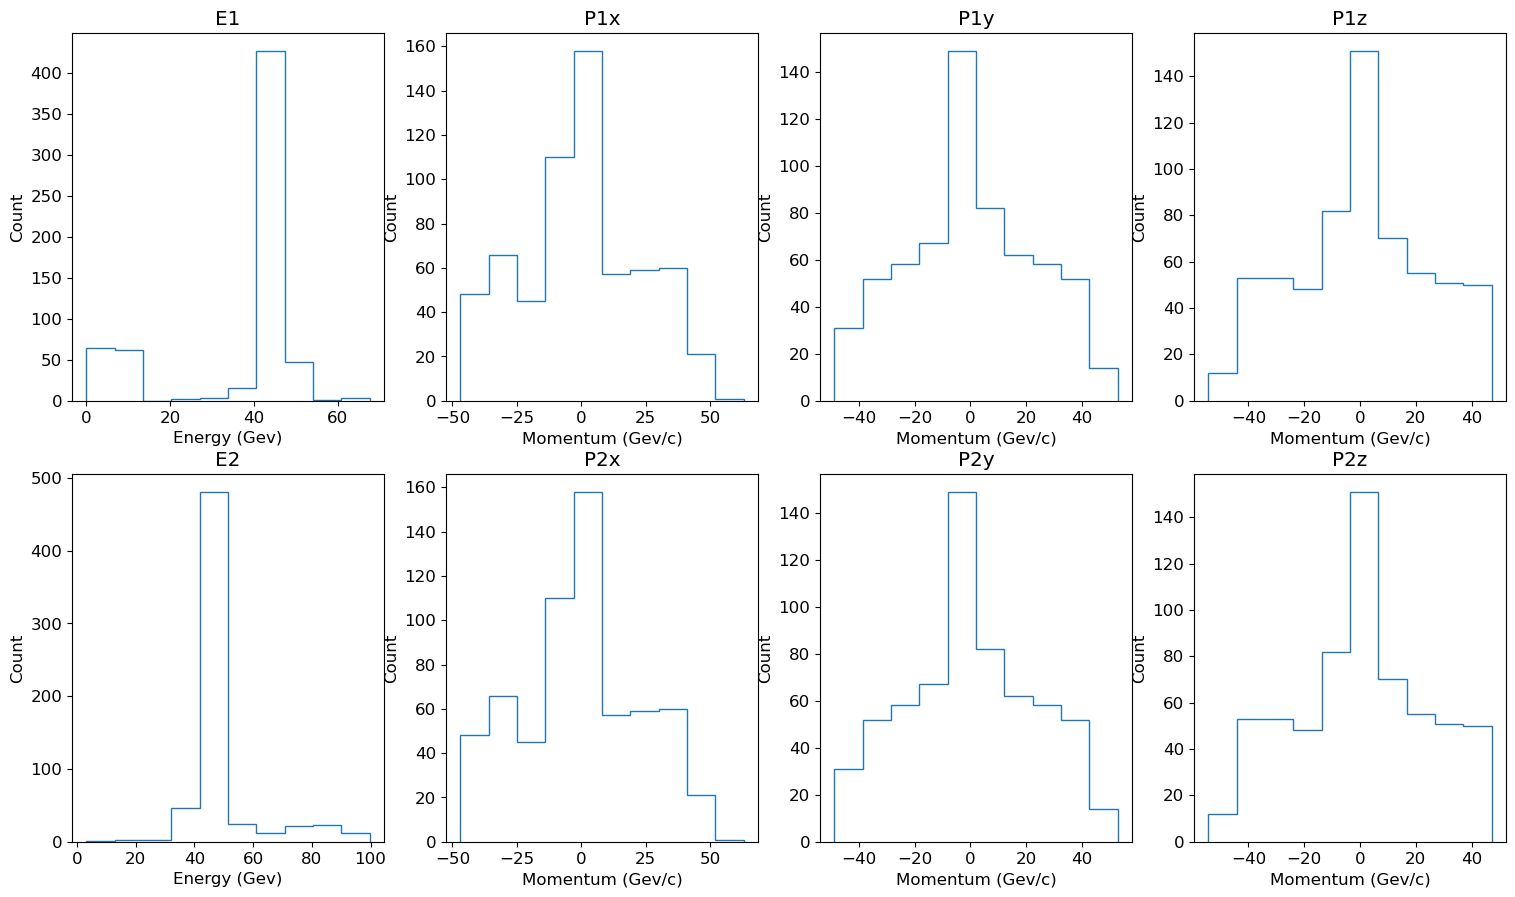

In [167]:
# Histograms of individual variables
fig, axs = plt.subplots(2,4,figsize=(18.5,10.5))

counts_e1, bins_e1 = np.histogram(data['E1'])
counts_p1x, bins_p1x = np.histogram(data['P1_x'])
counts_p1y, bins_p1y = np.histogram(data['P1_y'])
counts_p1z, bins_p1z = np.histogram(data['P1_z'])
counts_e2, bins_e2 = np.histogram(data['E2'])
counts_p2x, bins_p2x = np.histogram(data['P1_x'])
counts_p2y, bins_p2y = np.histogram(data['P1_y'])
counts_p2z, bins_p2z = np.histogram(data['P1_z'])

axs[0,0].stairs(counts_e1,bins_e1)
axs[0,0].set_title('E1')
axs[0,0].set_xlabel('Energy (Gev)')
axs[0,0].set_ylabel('Count')


axs[0,1].stairs(counts_p1x,bins_p1x)
axs[0,1].set_title('P1x')
axs[0,1].set_xlabel('Momentum (Gev/c)')
axs[0,1].set_ylabel('Count')

axs[0,2].stairs(counts_p1y,bins_p1y)
axs[0,2].set_title('P1y')
axs[0,2].set_xlabel('Momentum (Gev/c)')
axs[0,2].set_ylabel('Count')

axs[0,3].stairs(counts_p1z,bins_p1z)
axs[0,3].set_title('P1z')
axs[0,3].set_xlabel('Momentum (Gev/c)')
axs[0,3].set_ylabel('Count')

axs[1,0].stairs(counts_e2,bins_e2)
axs[1,0].set_title('E2')
axs[1,0].set_xlabel('Energy (Gev)')
axs[1,0].set_ylabel('Count')

axs[1,1].stairs(counts_p2x,bins_p2x)
axs[1,1].set_title('P2x')
axs[1,1].set_xlabel('Momentum (Gev/c)')
axs[1,1].set_ylabel('Count')

axs[1,2].stairs(counts_p2y,bins_p2y)
axs[1,2].set_title('P2y')
axs[1,2].set_xlabel('Momentum (Gev/c)')
axs[1,2].set_ylabel('Count')

axs[1,3].stairs(counts_p2z,bins_p2z)
axs[1,3].set_title('P2z')
axs[1,3].set_xlabel('Momentum (Gev/c)')
axs[1,3].set_ylabel('Count')


Text(0.5, 1.0, 'Reconstructed Invariable Mass Distribution')

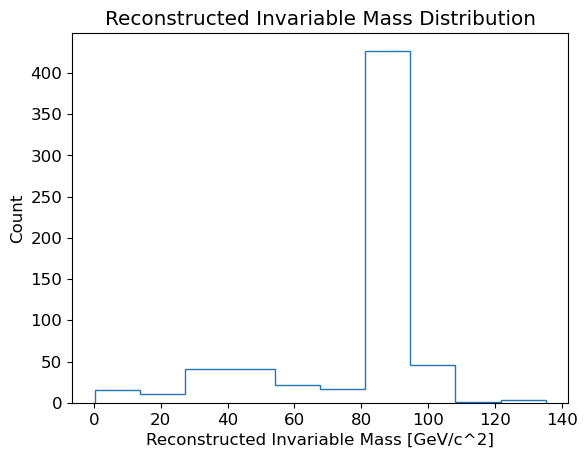

In [245]:
# Histogram of Reconstructed Invariable Mass (rim)
counts_rim, bins_rim = np.histogram(data['rim'])
plt.stairs(counts_rim, bins_rim)
plt.xlabel('Reconstructed Invariable Mass [GeV/c^2]')
plt.ylabel('Count')
plt.title('Reconstructed Invariable Mass Distribution')

_______________________________________________________________
Part 2a (2 pt)

make the following plots
- side-by-side subplots with E1 and E2
- Scatter plot of E2 vs E1

Text(0, 0.5, 'Count')

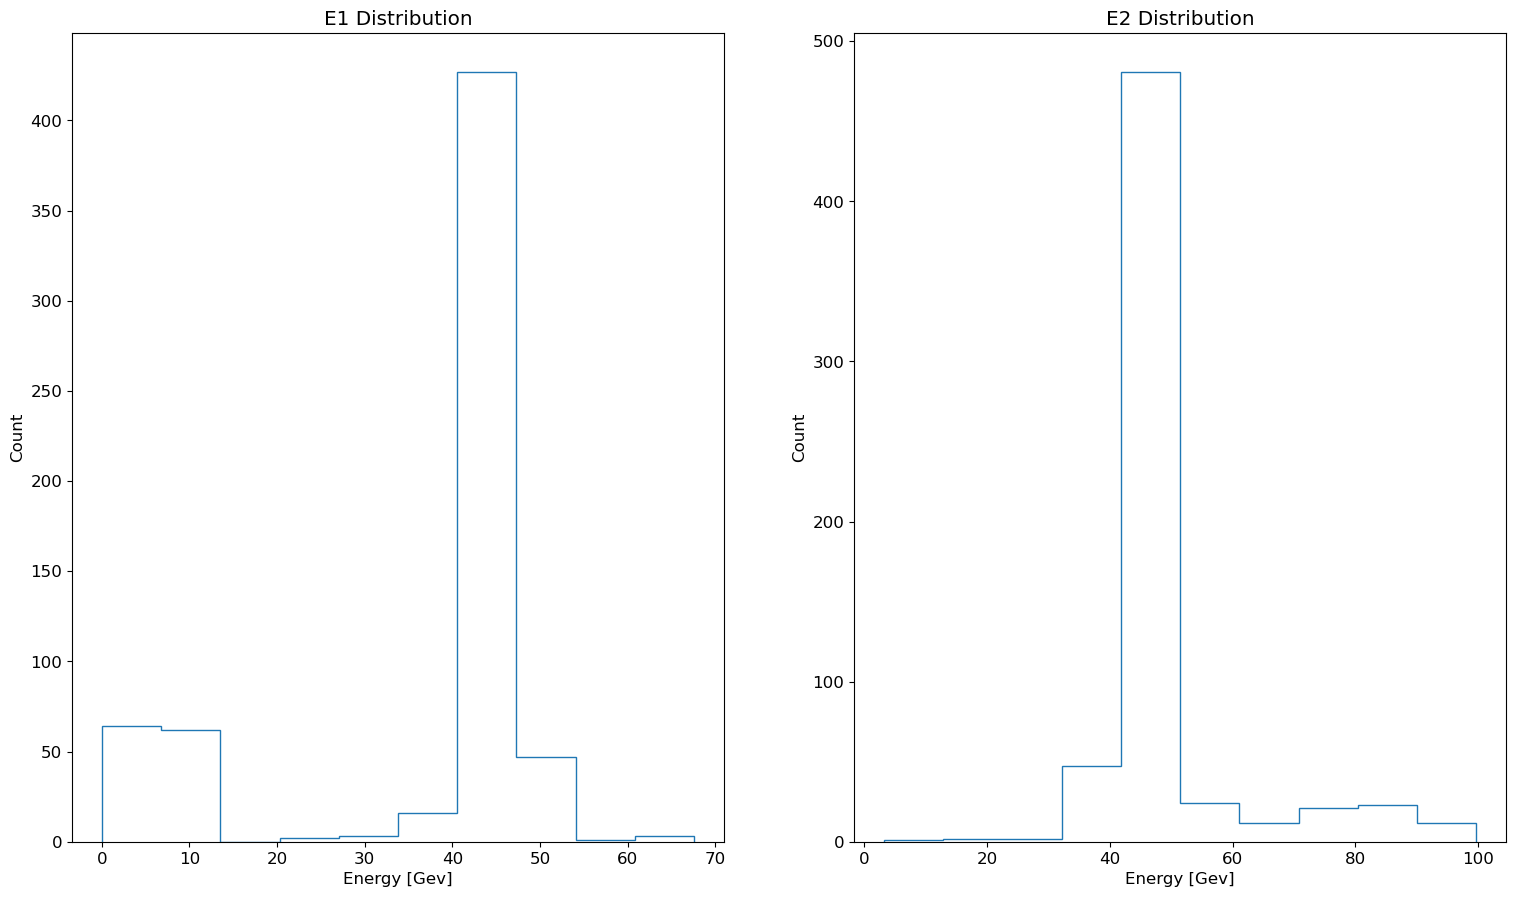

In [246]:
# Side by side subplots with E1 and E2
fig, axs = plt.subplots(1,2,figsize=(18.5,10.5))

axs[0].stairs(counts_e1,bins_e1)
axs[0].set_title('E1 Distribution')
axs[0].set_xlabel('Energy [Gev]')
axs[0].set_ylabel('Count')

axs[1].stairs(counts_e2,bins_e2)
axs[1].set_title('E2 Distribution')
axs[1].set_xlabel('Energy [Gev]')
axs[1].set_ylabel('Count')


Text(0, 0.5, 'E2 [GeV]')

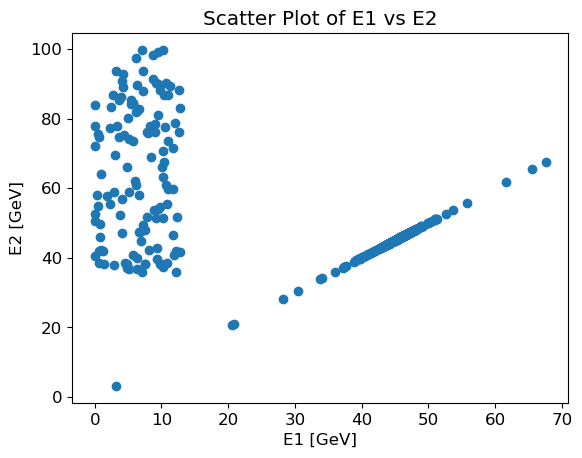

In [247]:
## Scatter plot E2 vs E1
plt.scatter(data['E1'],data['E2'])
plt.title('Scatter Plot of E1 vs E2')
plt.xlabel("E1 [GeV]")
plt.ylabel("E2 [GeV]")

________________________________________________________________
Observations: From plotting E1 vs E2, we can see that there is a lot of noise when E1 is low and simultaneously E2 is high. When that condition is not met however, we see E1 vs E2 follow a linear trend, which is more close to what we expect.

______________________________________________________________

_______________________________________________________________
Part 2b (2 pts)

- make appropriate cuts in the E2 vs E1 space to remove the "background" events
- plot the reconstructed invariant mass for the "signal" events on linear yscale and log yscale
- print the number of "signal" events

In [175]:
## Cut data

signal_data = data.loc[(data['E1']>18) & (data['E2']>25)] 

Text(0.5, 0, 'Reconstructed Invariant Mass [GeV/c^2]')

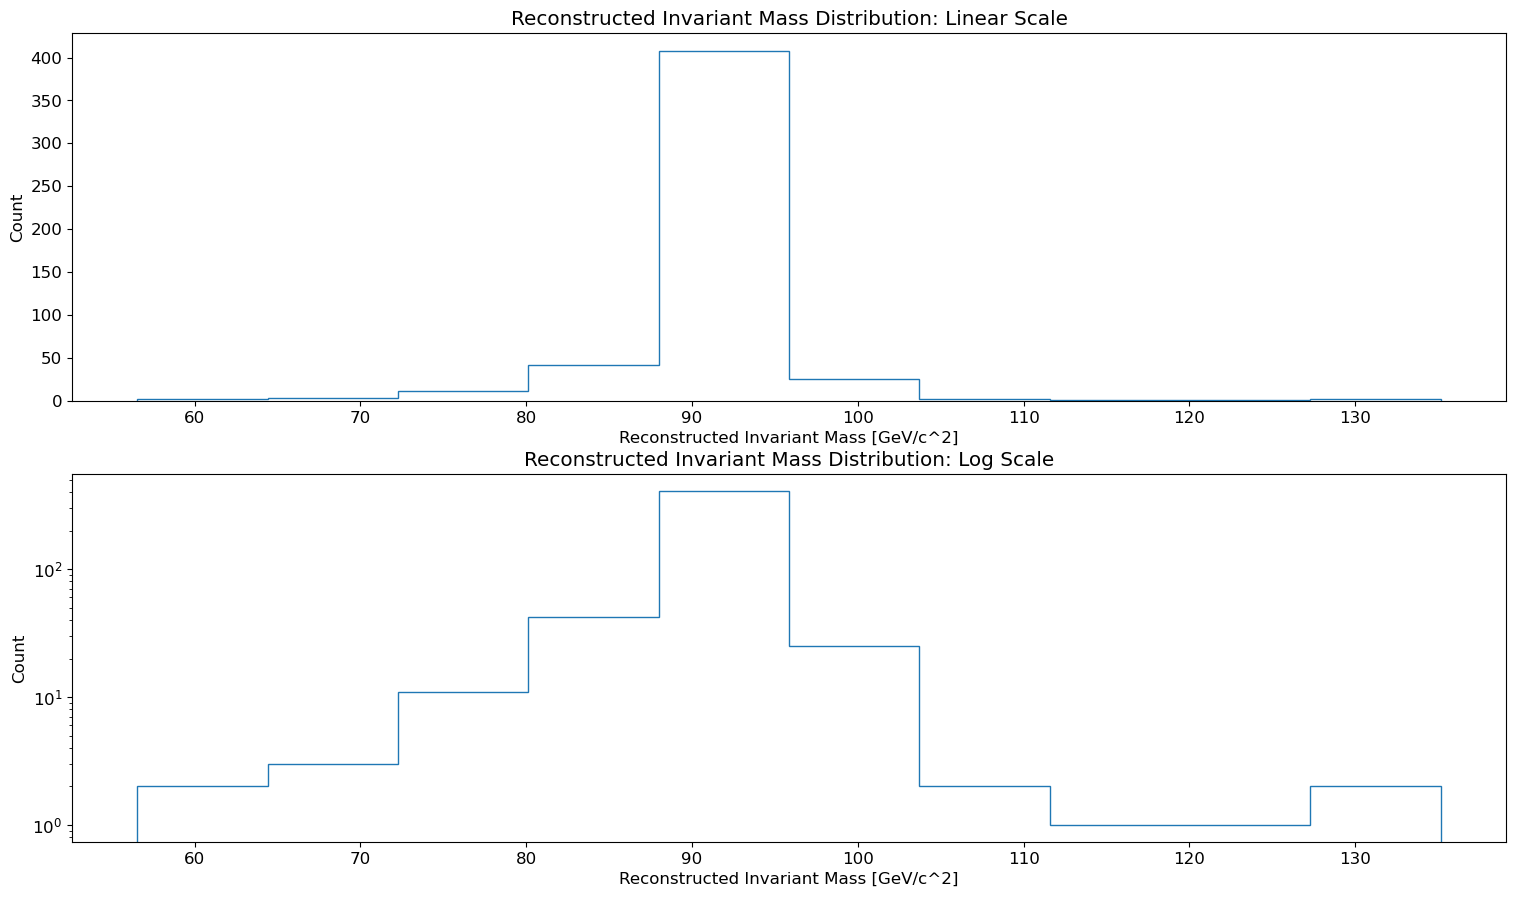

In [248]:
# Plot reconstructed invariant mass for the "signal" events
fig, axs = plt.subplots(2,1,figsize=(18.5,10.5))

counts_rim_signal, bins_rim_signal = np.histogram(signal_data['rim'])

axs[0].stairs(counts_rim_signal,bins_rim_signal)
axs[0].set_title('Reconstructed Invariant Mass Distribution: Linear Scale')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Reconstructed Invariant Mass [GeV/c^2]')

axs[1].stairs(counts_rim_signal,bins_rim_signal)
axs[1].set_yscale('log')
axs[1].set_title('Reconstructed Invariant Mass Distribution: Log Scale')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Reconstructed Invariant Mass [GeV/c^2]')


In [222]:
# Print number of signal events
signal_events = len(signal_data)
print(f'Number of signal events: {signal_events}')


Number of signal events: 497


_______________________________________________________________
Part 2c (2 pts)

Using the signal events and the values 

$M_Z = 91.1876 \, Gev/c^2$ <br>
$\Gamma_Z = 2.4952 \, GeV/c^2$

- plot the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV 
- make the same plot for the data but with errorbars = $\sqrt{N}$ and the Breit-Wigner theory distribution normalized to the total numer of signal data events.
- print the number of "signal" data events total, signal data events from 80-100 GeV, signal theory events from 80-100 GeV


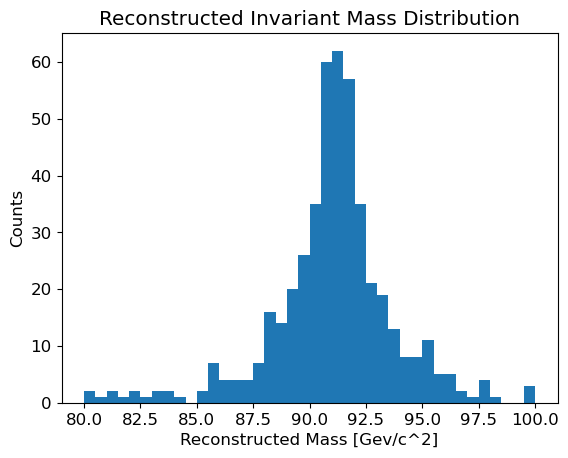

In [251]:
# Plot reconstructed invariant mass distr for signal events

n,b,_ = plt.hist(signal_data['rim'],40,range=(80,100))
b_c = .5*(b[1:]+b[:-1])
w = b[1]-b[0]

plt.title('Reconstructed Invariant Mass Distribution')
plt.xlabel('Reconstructed Mass [Gev/c^2]')
plt.ylabel('Counts')
plt.show()

n signal data total = 497
n signal data 80-100 = 468.0
n signal theory 80-100 = 457.19041831784943


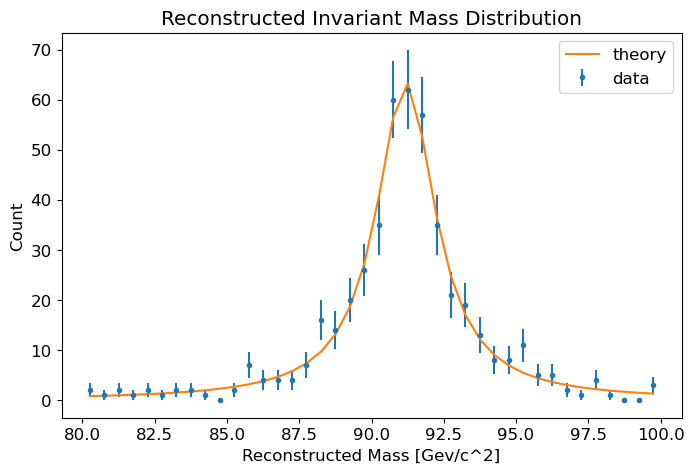

In [255]:
# Same plot but with error bars

M_z = 91.1876
FWHM_z = 2.4952

def breit_wigner(m,m0,gamma):
    bw = 1/(np.pi)*(gamma/2)/((m-m0)**2+(gamma/2)**2)
    return bw

thry = signal_events*w*breit_wigner(b_c,M_z,FWHM_z)

plt.figure(figsize=(8,5))
plt.errorbar(b_c,n,np.sqrt(n),fmt='.', label='data')
plt.plot(b_c,thry, label='theory')
plt.legend()
plt.xlabel('Reconstructed Mass [Gev/c^2]')
plt.ylabel('Count')
plt.title('Reconstructed Invariant Mass Distribution')
plt.show()


______________________________________________________________________
Part 3 (5 pts)

We are going to fit the signal events reconstructed invariant mass data to find the best-fit central mass $m_0$ and width $\Gamma$ in two ways
- binned $\chi^2$ 
- un-binned method of maximum likelihood (MML)

for the binned $\chi^2$ we will use
- binned data: 40 bins from 80-100 GeV
- theory = Breit-wigner normalized to the entire number of signal events (not the number from 80-100 GeV)
- we will use the integral approximation: predicted number in a bin = Thry(bin-center) * bin_width
- errors for each bin based on theory (i.e. $\sigma_i = \sqrt{N_{thry}}$)

for the MML method
- un-binned data 
- minimize the negative Log likelihood

you need to
- print the best-fit central mass and width for both fits
- plot the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV with errorbars = $\sqrt{N_{data}}$
- on same plot show the best-fit theory curve for both fits


In [264]:
# your code...

from scipy.optimize import minimize

def chi_square_1 (mass_paramters, bin_times, data):
    mass = mass_paramters[0]
    width = mass_paramters[1]
    n_norm = mass_paramters[2]
    bin_width = bin_times[1]-bin_times[0]
    thry = n_norm*bin_width*breit_wigner(bin_times,mass,width)
    chi2 = (data-thry)**2/(np.absolute(thry))
    return chi2.sum()

mass0 = 90,2,signal_events
bnds = [(60,110),(1,10),(signal_events/2,signal_events*2)]
res = minimize(chi_square_1,mass0,bounds=bnds,args=(b_c,n))
mass_fit1 = res.x[0]
width_fit1 = res.x[1]
n_fit = res.x[2]
print(r'Chi2 Mass = {:.4f}'.format(mass_fit1))
print(r'Chi2 Width = {:.4f}'.format(width_fit1))

# Log Likelihood
def likelihood(mass_parameters, data_i):
    mass = mass_parameters[0]
    width = np.absolute(mass_parameters[1])
    p_i = breit_wigner(data_i,mass,width) ## Needs to be normalized to 1
    L = -(np.log(p_i)).sum()
    return L

mass0 = 80,5
res = minimize(likelihood,mass0,bounds=((50,120),(1,3)), args=signal_data['rim'])
mass_fit2 = res.x[0]
width_fit2 = res.x[1]
print(r'MML Mass = {:.4f}'.format(mass_fit2))
print(r'MML Width = {:.4f}'.format(width_fit2))



Chi2 Mass = 91.1928
Chi2 Width = 2.7630
MML Mass = 91.1794
MML Width = 2.4510


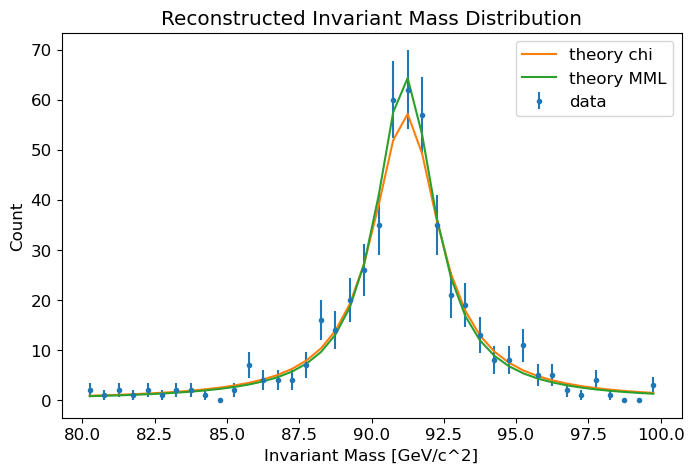

In [269]:
thryChi2 = signal_events*w*breit_wigner(b_c,mass_fit1,width_fit1)
thryMML = signal_events*w*breit_wigner(b_c,mass_fit2,width_fit2)
plt.figure(figsize=(8,5))
plt.errorbar(b_c,n,np.sqrt(n),fmt='.', label='data')
plt.plot(b_c,thryChi2, label='theory chi')
plt.plot(b_c,thryMML, label='theory MML')
plt.legend()
plt.title('Reconstructed Invariant Mass Distribution')
plt.xlabel('Invariant Mass [GeV/c^2]')
plt.ylabel('Count')
plt.show()




_________________________________________________________________
Part 4 (2 pts)

Using the best-fit parameters from MML fit show
- plot of data distribution with errorbars in 40 bins from 80-100 GeV
- smooth plot of best-fit theory curve
- show best fit values on plot
- show reduced $\chi^2$ and $\chi^2$ probability on plot
- residual plot as subplot below the main plot


Text(0.5, 1.0, 'Reconstructed Mass Residuals')

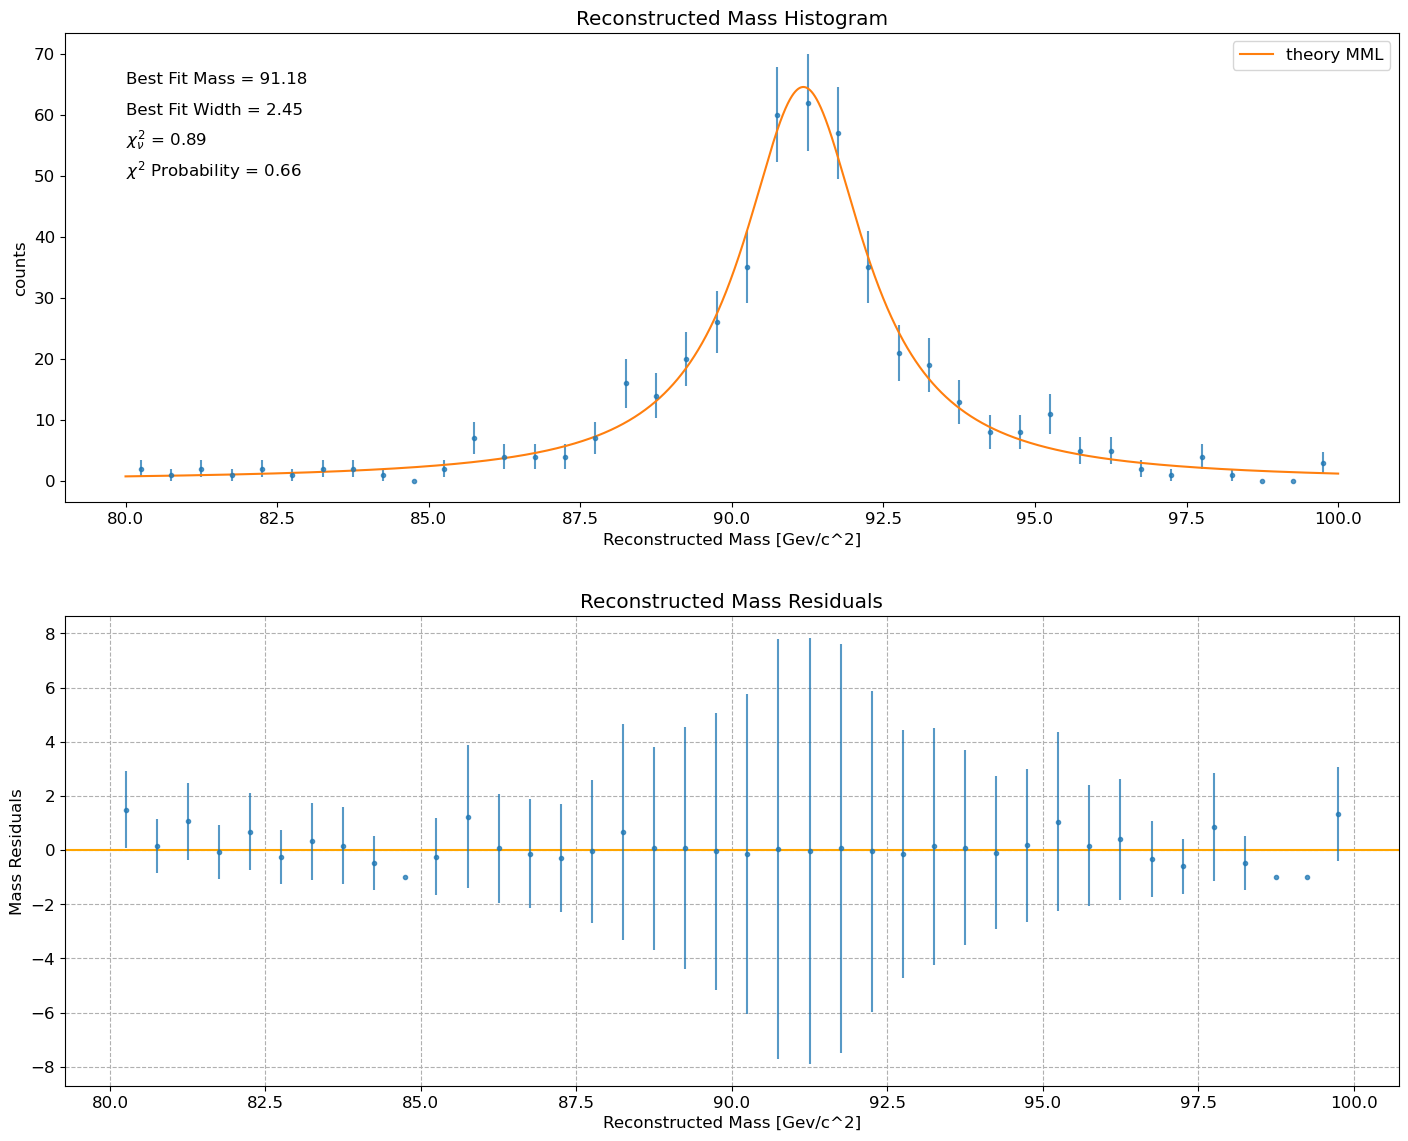

In [276]:
# your code...
import scipy.stats as st

chi_square = chi_square_1(mass_paramters=[mass_fit2,width_fit2,500],bin_times=b_c,data=n)
reduced_chi_square = chi_square / (38)
chi_square_prob = st.chi2.sf(chi_square,38)

fit_bins = np.linspace(80,100,10000)

thryMML = signal_events*w*breit_wigner(fit_bins,mass_fit2,width_fit2)

fig, axs = plt.subplots(2,1,figsize=(15.5,12.5))
fig.tight_layout(pad=5.0)
axs[0].errorbar(b_c, n, yerr=np.sqrt(n),fmt='.', alpha=0.75)
axs[0].plot(fit_bins,thryMML, label='theory MML')
axs[0].set_xlabel('Reconstructed Mass [Gev/c^2]')
axs[0].set_ylabel('counts')
axs[0].set_title('Reconstructed Mass Histogram')
axs[0].text(80,65,r'Best Fit Mass = {:.2f}'.format(mass_fit2))
axs[0].text(80,60,r'Best Fit Width = {:.2f}'.format(width_fit2))
axs[0].text(80,55,r'$\chi_\nu^2$ = {:.2f}'.format(reduced_chi_square))
axs[0].text(80,50,r'$\chi^2$ Probability = {:.2f}'.format(chi_square_prob))
axs[0].legend()

axs[1].axhline(y=0, color='orange')
axs[1].errorbar(b_c, ((n - signal_events*w*breit_wigner(b_c,mass_fit2,width_fit2))/(signal_events*w*breit_wigner(b_c,mass_fit2,width_fit2))), yerr=np.sqrt(n),fmt='.', alpha=0.75)
axs[1].grid(True,linestyle='--')
axs[1].set_xlabel('Reconstructed Mass [Gev/c^2]')
axs[1].set_ylabel(r'Mass Residuals')
axs[1].set_title('Reconstructed Mass Residuals')



_____________________________________________________________________________
Part 5a (5 pts)

calculate and show the $-2 \Delta log \cal{L}$

- calculate the $-2 \Delta log \cal{L}$
- show a 'contourf' in 500 levels for the $-2 \Delta log \cal{L}$
- show the 68% and 95% 2D joint confidenece regions on the plot
- show the best-fit point
- show the true value from part 2c above

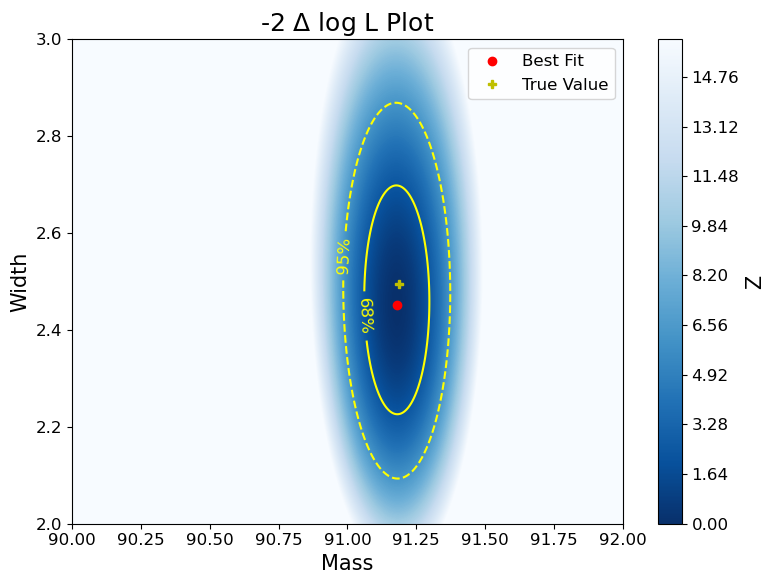

In [243]:
# your code...
nbin=500
z_min = res.fun
z_map = np.zeros((nbin,nbin))
var_1 = np.linspace(90,92,nbin) # Mass
var_2 = np.linspace(2,3,nbin) # Width
X,Y = np.meshgrid(var_1,var_2)

for i in range(nbin):
    for j in range(nbin):
        z_map[j,i] = likelihood((var_1[i],var_2[j]),signal_data['rim'])


z_map_i = 2*(z_map - z_min)
negative_logL = np.minimum(z_map_i,16.*np.ones((nbin,nbin)))


plt.figure(figsize=(8,6)) # make the 2-D contour plot
plt.rcParams['font.size'] = 12

plt.subplot(1,1,1) #1 subplot for contourf

plt.contourf(X,Y,negative_logL,500,cmap='Blues_r') #make contourf
cbar = plt.colorbar()  # plot colorbar on right for contourf
levels = [2.30,6.17]  #from lecture 5, slide 3 for 2dof and 68%,95% regions
CS = plt.contour(X,Y,negative_logL,levels,colors=['yellow','yellow'],linestyles=['solid','dashed'])
#next for labeling contours with text
fmt = {}
strs = ['68%', '95%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
plt.clabel(CS,CS.levels,inline=True,fmt=fmt) #put strings into labels
cbar.set_label(r'Z',fontsize=15)

plt.plot(mass_fit2,width_fit2,'ro',label='Best Fit') #marker for best fit
plt.plot(M_z,FWHM_z,'yP',label='True Value') #marker for True value
plt.xlabel(r'Mass',fontsize=15)
plt.ylabel(r'Width',size=15)
plt.legend()
plt.title(r'-2 $\Delta$ log L Plot',size=18)



plt.tight_layout()
plt.show()

_____________________________________________________________________________
Part 5b (3 pts)

using the $-2 \Delta log \cal{L}$ from above 

- make 2 invidual subplots, 1 for each parameter, of the $-2 \Delta log \cal{L}$ 
- mark the $\pm 1\sigma$ region on each plot for the 1D confidence region
- print the best fit value and 1 sigma upper and lower range for each parameter

NOTE: for each parameter take the negll that is lowest for the range of other parameter (see straight line fit example)


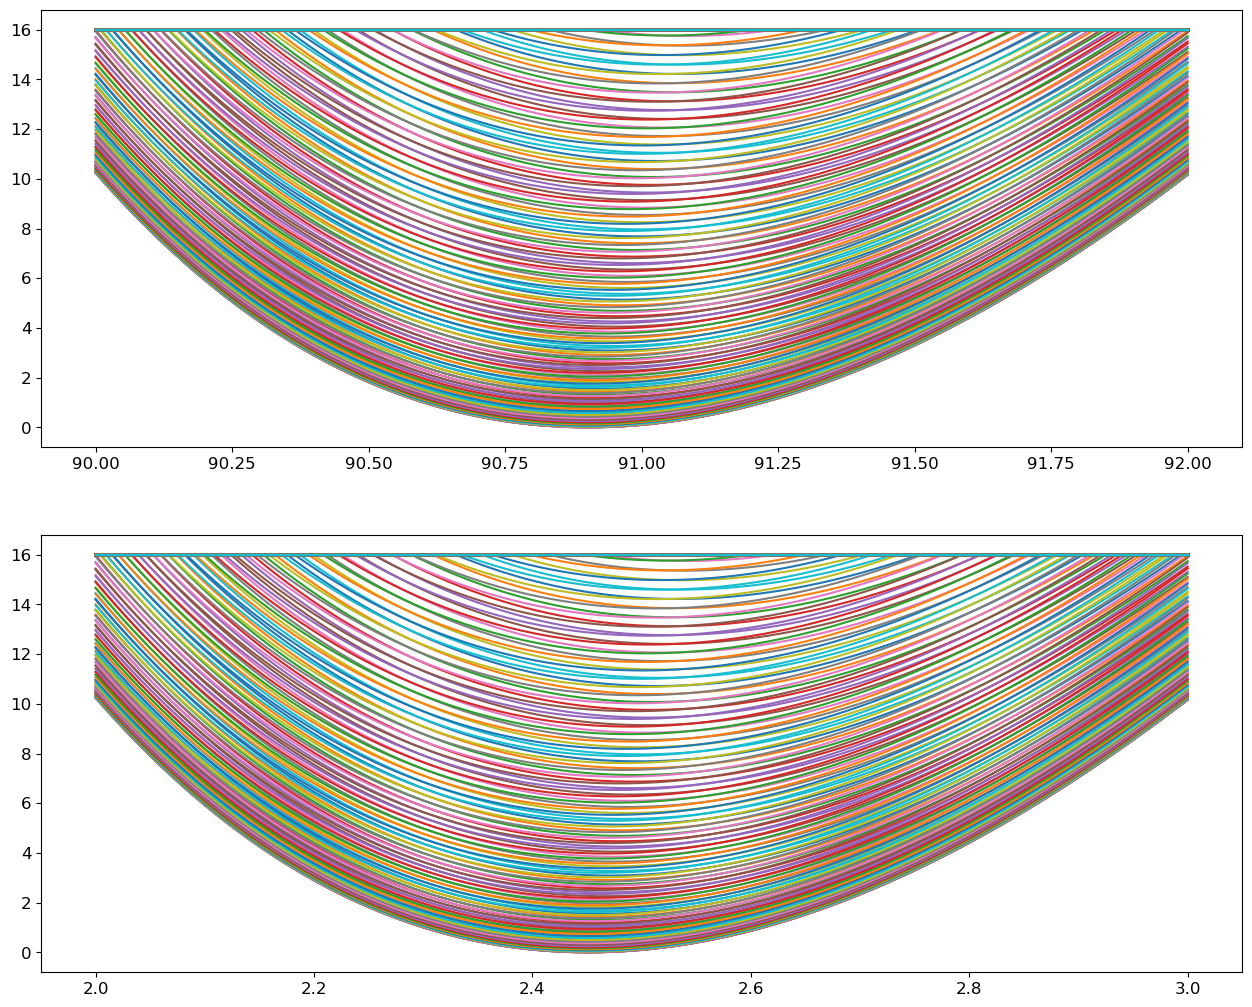

In [291]:
# your code...
fig, axs = plt.subplots(2,1,figsize=(15.5,12.5))


axs[0].plot(var_1,negative_logL)


axs[1].plot(var_2,negative_logL)


___________________________________________________________________
Summary and Conclusions:
In the end, I was pretty confused on how to finish out part 5b simply because I am sick and have no energy left. However, I am hopeful I would have figured it out had I had any capacity left to think. This was an interesting lab to work through, I especially enjoyed seeing the scatter plot of E1 vs E2 and cutting out the signal noise. There is always interesting ways to view data, I never would have considered that as a means of figuring out your most valuable points. Additionally, seeing the fit using the minimize function and plotting our confidence intervals with the contour was also pretty cool. In general, just wish I could have finished strong. Best regards.
____________________________________________________________________